# DSCI 523 Lab Assignment 2

## Working with dates, strings & factors, two-table joins, and base R control flow

## Lab Mechanics
Worth 5% of your lab grade.

- All files necessary to run your work must be pushed to your GitHub.ubc.ca repository for this lab.
- You need to have a minimum of 3 commit messages associated with your GitHub.ubc.ca repository for this lab.
- You must also submit this `.ipynb` notebook of this homework to Gradescope, and it must be executed so the TA's can see the results of your work.
- **There is autograding in this lab, so please do not move or rename this file. Also, do not copy and paste cells, if you need to add new cells, create new cells via the "Insert a cell below" button instead.**
- Follow the [MDS general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

### Getting your homework (i.e., worksheet and lab repositories) from GitHub.ubc.ca onto your computer

Watch the video titled "Downloading the lab assignment from GitHub to JupyterLab" from DSCI 521, accessible [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_521_platforms-dsci_students/materials/appendices/submit-homework.html).

## Code Quality
rubric={quality:5}

The code that you write for this assignment will be given one overall grade for code quality, see our code quality rubric as a guide to what we are looking for. Also, for this course (and other MDS courses that use R), we are trying to follow the tidyverse code style. There is a guide you can refer too: http://style.tidyverse.org/

Each code question will also be assessed for code accuracy (i.e., does it do what it is supposed to do?).

## Writing 
rubric={writing:5}

To get the marks for this writing component, you should:

- Use proper English, spelling, and grammar throughout your submission (the non-coding parts).
- Be succinct. This means being specific about what you want to communicate, without being superfluous.

## Table of contents

1. [Exercise 1: Working with dates](#Exercise-1:-Working-with-dates)

2. [Exercise 2: Working with strings](#Exercise-2:-Working-with-strings)

3. [Exercise 3: Taking control of your factors](#Exercise-3:-Taking-control-of-your-factors)

4. [Exercise 4: Two table joins cheatsheet](#Exercise-4:-Two-table-joins-cheatsheet)

5. [Exercise 5: Iteration with base R](#Exercise-5:-Control-flow-with-base-R)

7. [Exercise 6: (Optional)](#Exercise-7:-(Optional))

8. [Submission instructions](#Submission)

Run the cell below to load the libraries needed for this lab, as well as the test file so you can check your answers as you go!

In [1]:
library(gapminder)
library(lubridate)
library(testthat)
library(tidyverse)
options(repr.matrix.max.rows = 10)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ readr::edition_get()     masks testthat::edition_get()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ purrr::is_null()         masks testthat::is_null()
✖ dplyr::lag()             masks stats::lag(

## Exercise 1: Working with dates
rubric={autograde:15}

We have been in the COVID-19 global pandemic for some time now. With your new data science skills, you can start to look at and visualize the data about this impactful pandemic yourself. Let's look at cumulative confirmed cases in British Columbia over the 3 month period from 2021/06/10 to 2021/09/10 (it was a peak season then). We can obtain such data from the [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19).

In particular, use R to load the `time_series_covid19_confirmed_global.csv` file located at the url: [https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv).


Then you will need to filter this global data set for date from the province of British Columbia for the time interval of 2021/06/10 to 2021/09/10. To do this, you might need to tidy the data before you filter the time interval.  The final data set for data visualization should be named `bc_covid19_confirmed_3_months` and have only the following two columns: 
- one named `date`, which should be of class "Date"
- one named `confirmed_cases`, which should of class "numeric" (and type "double")

In [2]:
url <- "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series_covid19_confirmed_global <- NULL
# create a time interval that you want to calculate
three_months <- NULL

bc_covid19_confirmed_3_months <- NULL

# BEGIN SOLUTION NO PROMPT
time_series_covid19_confirmed_global <- read_csv(url)
three_months <- interval(ymd("2021-06-10"), ymd("2021-09-10"))

bc_covid19_confirmed_3_months <- time_series_covid19_confirmed_global |>
  filter(`Province/State` == "British Columbia") |>
  select(5:ncol(time_series_covid19_confirmed_global)) |>
  pivot_longer(cols = everything(),
              names_to = "date",
              values_to = "confirmed_cases") |>
  mutate(date = mdy(date)) |>
  filter(date %within% three_months)
# END SOLUTION
bc_covid19_confirmed_3_months

Rows: 285 Columns: 967
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Province/State, Country/Region
dbl (965): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,confirmed_cases
<date>,<dbl>
2021-06-10,145996
2021-06-11,146176
2021-06-12,146176
2021-06-13,146176
2021-06-14,146453
⋮,⋮
2021-09-06,168325
2021-09-07,170750
2021-09-08,171564


In [3]:
# visible tests to check object name
# the remaining tests are hidden
expect_true(exists("bc_covid19_confirmed_3_months"))
expect_named(bc_covid19_confirmed_3_months, c("date", "confirmed_cases"), ignore.order = TRUE)

In [4]:
# HIDDEN
expect_s3_class(bc_covid19_confirmed_3_months, "data.frame")
expect_type(bc_covid19_confirmed_3_months$confirmed_cases, "double")
expect_s3_class(bc_covid19_confirmed_3_months$date, "Date")
expect_equal(nrow(bc_covid19_confirmed_3_months), 93)
expect_equal(ncol(bc_covid19_confirmed_3_months), 2)
expect_equal(sum(as.numeric(bc_covid19_confirmed_3_months$confirmed_cases)), 14246272)

Let's now visualize how cases have changed over the last three months in British Columbia by viewing cumulative cases per day:

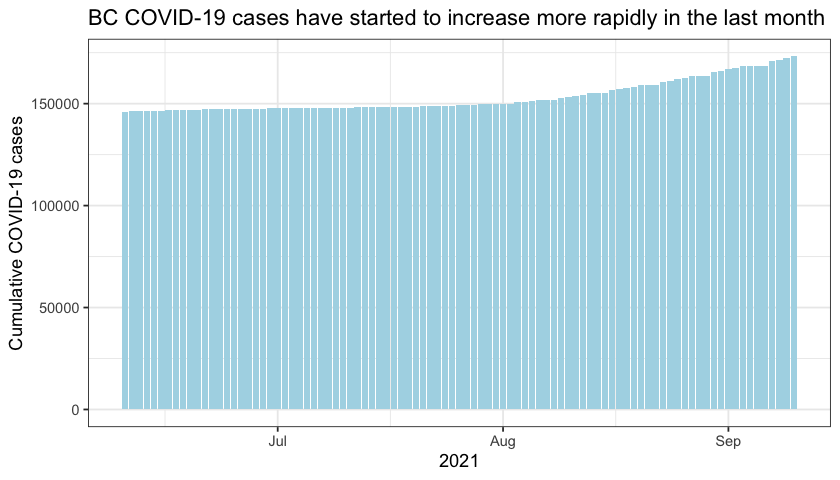

In [5]:
options(repr.plot.width = 7, repr.plot.height = 4)
three_months_BC <- ggplot(bc_covid19_confirmed_3_months, aes(x = date, y = confirmed_cases)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  xlab("2021") + 
  ylab("Cumulative COVID-19 cases") +
  ggtitle("BC COVID-19 cases have started to increase more rapidly in the last month") +
  theme_bw()

three_months_BC

## Exercise 2: Working with strings

rubric={accuracy:20}

You have learned about string operations combined with regular expressions.    

  * Pattern matching with `str_match()`   
  * String replacement with `str_replace()` etc.    
  * String splitting with `str_split()` etc.    

Now you are ready to apply them to the real world of data cleaning!    

In this exercise, you will start with the dirty version of `Gapminder` in our course repository, [gapminderDataFiveYear_dirty.txt](https://github.com/STAT545-UBC/STAT545-UBC.github.io/blob/master/gapminderDataFiveYear_dirty.txt) (use ```read_tsv``` to read it), and clean it up with all the string functions you've learned. The goal of this exercise is to use R code to clean up the dirty `gapminder` to the point that it's identical to the clean `gapminder`.  Remember that in R, to define a single backslash in a regex expression, you should use two backslahses in your expression (`\\`), you can read more about why [here](https://cran.r-project.org/web/packages/stringr/vignettes/regular-expressions.html#escaping). 

To help you, we will provide you with some useful code to help you test whether your cleaned-up dirty Gapminder is the same as the clean gapminder data set from the gapminder R package. Also, [this blog post on how to compare data frames](https://sharla.party/post/comparing-two-dfs/) could be really helpful in completing your task.

Things you might want to do to clean up `gapminderDataFiveYear_dirty.txt`:

- check if the data is tidy (it should have the same variables as `gapminder::gapminder`;
- check if there is any missing data, if there is missing data fill it in with sensible values if possible;
- check that all values match those in `gapminder::gapminder` (e.g., check capitalization, spelling, grammar, etc);
- make sure the columns are the same types as `gapminder::gapminder`.

In [6]:
# BEGIN SOLUTION NO PROMPT
file_url <- "https://raw.githubusercontent.com/STAT545-UBC/STAT545-UBC.github.io/master/gapminderDataFiveYear_dirty.txt"
dirty_gap <- read_tsv(file_url) %>%
  separate(region, sep = "_", remove = TRUE, into = c("continent", "country")) %>%
  mutate(continent = str_replace(continent, "^$", "Americas"),
         country = str_to_title(country),
         country = str_replace(country, "\\bAnd\\b", "and"),
         country = str_replace(country, "\\bOf\\b", "of"),
         country = str_replace(country, "\\bThe\\b", "the"),
         country = str_replace(country, "Democratic Republic of the Congo|Congo, Democratic Republic", "Congo, Dem. Rep."),
         country = str_replace(country, "Cote D'ivoire|Cote D'ivore", "Cote d'Ivoire"),
         country = as.factor(country),
         continent = as.factor(continent),
         pop = as.integer(pop),
         year = as.integer(year)) %>%
        select(country, continent, year, lifeExp, pop, gdpPercap) %>%
        arrange(country, year)
head(dirty_gap)
# END SOLUTION

Rows: 1704 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): region
dbl (4): year, pop, lifeExp, gdpPercap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [7]:
test_that("dirty_gap is not the same as gapminder", {
  expect_equal(dirty_gap, gapminder)
})

Test passed 🥇


## Exercise 3: Taking control of your factors
rubric={accuracy:8,reasoning:8}

Explore the effects of the {dplyr} `arrange` function. Does arranging the data have any effect on, say, a figure? What about the {forcats} `fct_reorder` function? This exploration must involve the data, the factor levels, and some figures, as well as a written explanation of what you are doing and what you find. Choose any data set you wish to demonstrate this. We provide code for a scatter plot figure you could modify for your data set to help you out. 

Warning message:
“Removed 2 rows containing missing values (geom_point).”


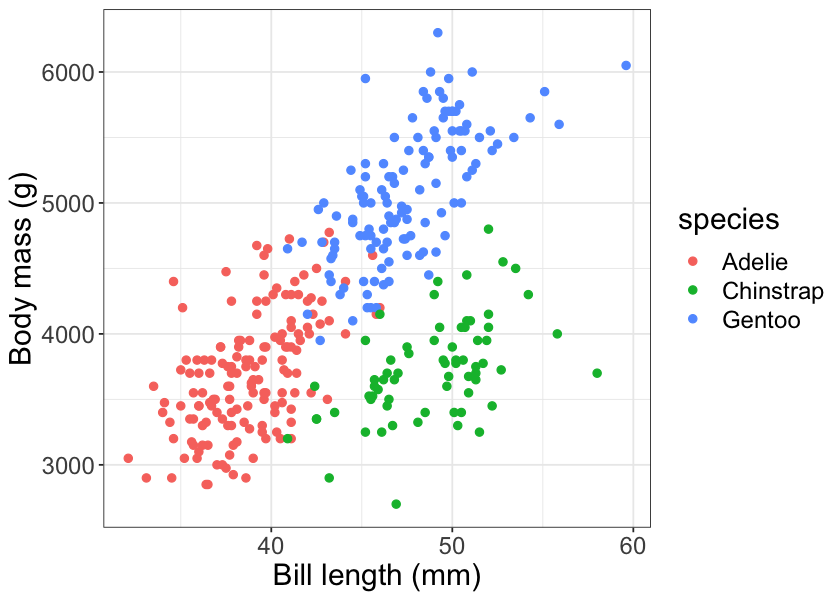

In [8]:
# sample plot code you can modify
library(palmerpenguins)

options(repr.plot.width = 7, repr.plot.height = 5)
penguins_original <- ggplot(data = penguins, mapping = aes(x = bill_length_mm, 
                                      y = body_mass_g,
                                     colour = species)) +
    geom_point(size = 2) +
    xlab("Bill length (mm)") +
    ylab("Body mass (g)") +
    theme_bw() +
    theme(text = element_text(size = 18))
penguins_original

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


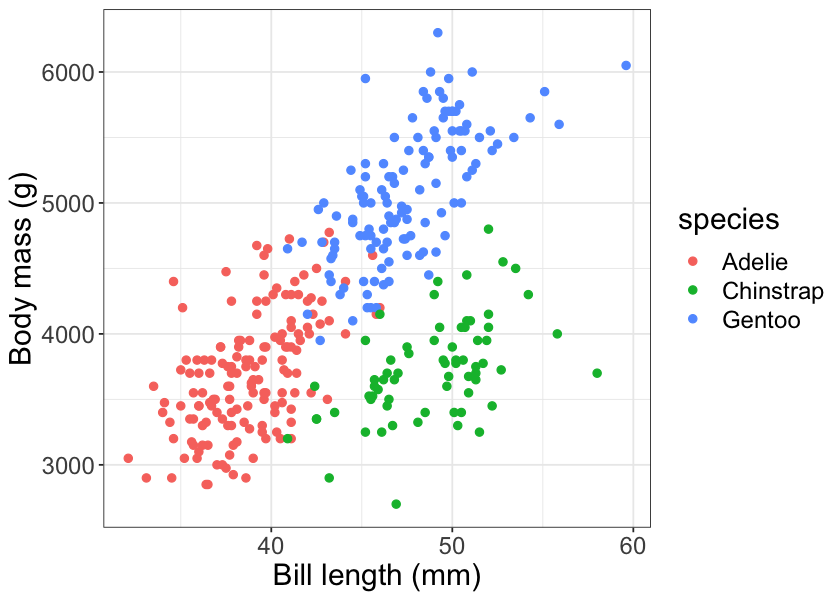

Warning message:
“Removed 2 rows containing missing values (geom_point).”


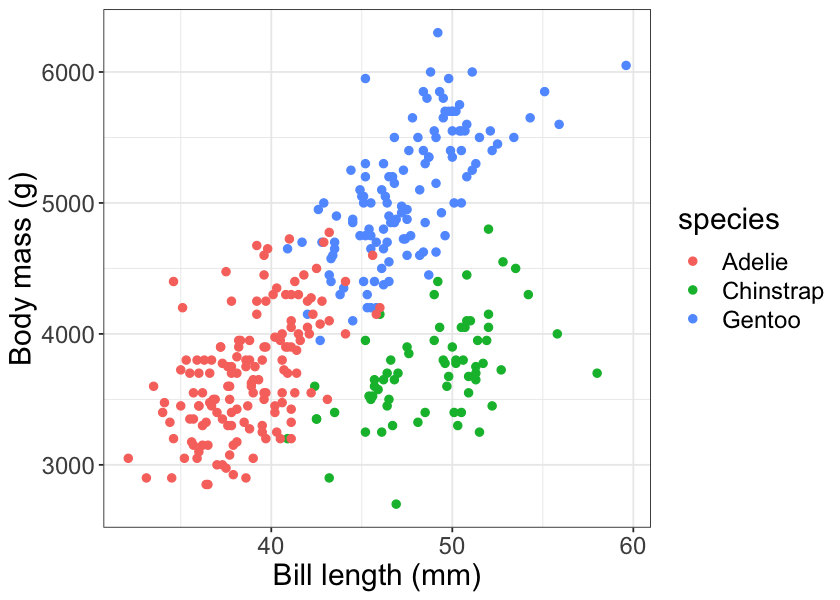

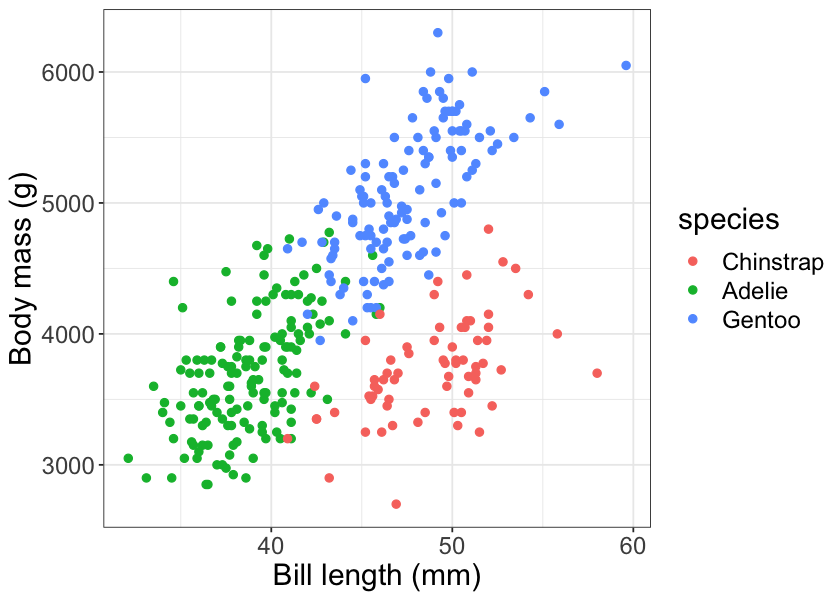

In [9]:
# BEGIN SOLUTION NO PROMPT
penguins_original <- ggplot(data = penguins, mapping = aes(x = bill_length_mm, 
                                      y = body_mass_g,
                                     colour = species)) +
    geom_point(size = 2) +
    xlab("Bill length (mm)") +
    ylab("Body mass (g)") +
    theme_bw() +
    theme(text = element_text(size = 18))
penguins_original

penguins_arranged <- penguins %>% 
    arrange(desc(species)) %>% 
    ggplot(mapping = aes(x = bill_length_mm,
                         y = body_mass_g,
                         colour = species)) +
        geom_point(size = 2) +
        xlab("Bill length (mm)") +
        ylab("Body mass (g)") +
        theme_bw() +
        theme(text = element_text(size = 18))
penguins_arranged

penguins_fct_reordered <- penguins %>%
    mutate(species = fct_reorder(species, body_mass_g, min, na.rm = TRUE)) %>% 
    ggplot(mapping = aes(x = bill_length_mm,
                         y = body_mass_g,
                         colour = species)) +
        geom_point(size = 2) +
        xlab("Bill length (mm)") +
        ylab("Body mass (g)") +
        theme_bw() +
        theme(text = element_text(size = 18))
penguins_fct_reordered
# END SOLUTION

The code snippet above shows a very simple example of how `arrange()` has no effect on figures, but that `fct_reorder()` does. In this example, we plot body mass vs bill length from the `penguins` dataset, colored by a factored `species` variable. The first plot is the original data. The second plot is the data arranged based on body mass - it shows that `arrange` has no effect on plot aesthetics. The third plot uses refactored where the factor order was assigned based on minimum body weight. This shows that refactoring has an effect on the aesthetics of the plot, namely, through the legend and color ordering. Refactoring can be a very useful method of controlling plots.

## Exercise 4: Two table joins cheatsheet
rubric={accuracy:9,reasoning:9} 

This exercise is to help you familiarize with the different _joins_ available in `dplyr`. First, take a look at [Jenny Bryan's cheatsheet](http://stat545.com/bit001_dplyr-cheatsheet.html). Your task is to create your own cheatsheet but focused on something you care about. Examples:

  - Pets I have owned + breed + friendly vs. unfriendly + ??. Join to a table of pet breed, including variables for furry vs not furry, mammal true or false, etc.
  - Movies and studios....
  - Athletes and teams....

**You are expected to create your own data set for this question, do not use an existing data set.**|

While demonstrating the joins, provide a narrative explaining what you are doing and what is revealed through the joins.

You will likely need to iterate between your data prep and your joining to make your explorations comprehensive and interesting. For example, you will want a specific amount (or lack) of overlap between the two data frames, in order to demonstrate all the different joins. You will want both the data frames to be as small as possible, while still retaining the expository value.

You should create this cheatsheet as a separate `.ipynb` file that lives in this repo that you link to from here (relative paths please!).

Link to file goes here.

## Exercise 5: Control flow with base R
rubric={accuracy:16}

There was a major (> 8,600 acres) wildfire (named the El Dorado fire) that started on Saturday, September 5, 2020 in San Bernardino County which blame has been assigned to the use of a smoke-generating pyrotechnic device at a gender reveal party (Source: https://www.cbc.ca/news/world/califoronia-wildfires-september-7-gender-reveal-party-1.5714719). 

> <img src="https://i.cbc.ca/1.5715027.1599506927!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/california-wildfires.jpg" width=300>
>
> *A firefighter battles the Creek Fire as it threatens homes in the Cascadel Woods neighborhood of Madera County, Calif., on Monday, Sept. 7, 2020. (Noah Berger/The Associated Press)*

Below we give you two ordered lists, the first contains the air quality index (AQI) values, the daily reported measured values of AQI, for the area of Los Angeles-Long Beach-Anaheim, California, USA for 18 days. This is the closest major city to the El Dorado fire. The second ordered list contains the dates for each measurement. Data source: https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker

Your task is to use base R control flow (specifically `for` loops and `if`/`else` statements) to calculate the average of the maximum daily AQI measurements, before the fire began, and afterwards. Use a `print` statement to output your results in a sentence that communicates your findings. *Hint: `paste` will be a useful function for this.* 

Note: treat the AQI from 2020-09-05 (the day the fire started) in the group after the fire.

In [10]:
aqi <- list(165, 179, 199, 136, 91, 121, 161, 78, 84,
               80, 73, 55, 57, 55, 55, 55, 62, 68)
date <- list("2020-09-13", "2020-09-12", "2020-09-11",
             "2020-09-10", "2020-09-09", "2020-09-08", 
             "2020-09-07", "2020-09-06", "2020-09-05",
             "2020-09-04", "2020-09-03", "2020-09-02", 
             "2020-09-01", "2020-08-31", "2020-08-30",
             "2020-08-29", "2020-08-28", "2020-08-27")
# BEGIN SOLUTION NO PROMPT
avg_max_before <- 0
before_count <- 0
avg_max_after <- 0
after_count <- 0

for (i in seq_along(date)) {
    if (date[[i]] <  "2020-09-05") {
        avg_max_before <- avg_max_before + aqi[[i]]
        before_count <- before_count + 1
    } else {
        avg_max_after <- avg_max_after + aqi[[i]]
        after_count <- after_count + 1
    }
}

avg_max_before <- avg_max_before / before_count
avg_max_after <- avg_max_after / after_count

print(paste("The nine day daily average of reported AQI values before the fire was", 
            round(avg_max_before)))
print(paste("The nine day daily average of reported AQI values after the fire was", 
            round(avg_max_after)))
# END SOLUTION

[1] "The nine day daily average of reported AQI values before the fire was 62"
[1] "The nine day daily average of reported AQI values after the fire was 135"


## Exercise 6: (Optional)
rubric={accuracy:5}

In the {canlang} package there are two separate data sets (`region_lang` and `region_data`) that would be useful to join together to answer such statistical questions what are the top 10 regions in Canada which report a given language as their mother tongue, measured by the percentage of people in that region who claim that language as their mother tongue. 

Your task here for this **optional** question is to choose a language you are intersted in, and create such a table.

In [11]:
# BEGIN SOLUTION NO PROMPT
library(canlang)

top_10_regions_cantonese <- region_lang %>% 
    filter(language == "Cantonese") %>%
    select(region, mother_tongue) %>%
    inner_join(region_data) %>%
    mutate(percent_mother_tongue = round(mother_tongue / population * 100, 2)) %>%
    arrange(desc(percent_mother_tongue)) %>%
    slice(1:10) %>%
    select(region, percent_mother_tongue)
top_10_regions_cantonese
# END SOLUTION

Joining, by = "region"


region,percent_mother_tongue
<chr>,<dbl>
Vancouver,7.48
Toronto,4.18
Calgary,2.46
Edmonton,1.72
Victoria,1.40
Ottawa - Gatineau,0.79
Guelph,0.78
Winnipeg,0.78
Saskatoon,0.63


Congratulations! You are done the lab!!! Pat yourself on the back, make sure you pushed 3 commits to GitHub and submit your worksheet to Gradescope!